In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/project'
!ls

/content/drive/My Drive/project
data_folder.png		    DeepLearningModel  wikiart_scraper.py
deepLearning.ipynb	    output
deepLearning.ipynb（副本）  run_all_styles.py


In [ ]:
!python3 'run_all_styles.py'

In [1]:
!pip install tensorflow

Loading Image Dataset for Deep Learning Model <br>
reference: https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
#from tensorflow import keras
from  tensorflow.keras import layers
from tensorflow.keras.models import Sequential #, Model

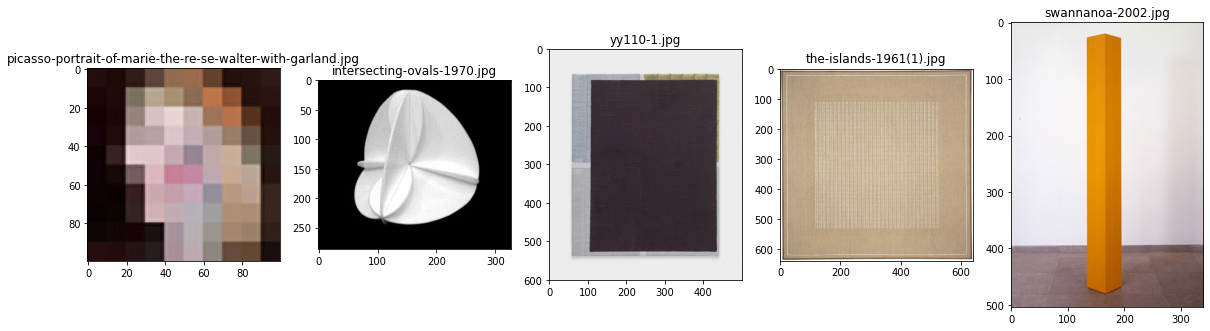

In [6]:
import random
from matplotlib import pyplot as plt ##
import matplotlib.image as mpimg ##
# random 5 artworks of Minimalism 


plt.figure(figsize=(20,20))

class_folder = './output/minimalism'

for i in range(5):
    file = random.choice(os.listdir(class_folder))
    image_path= os.path.join(class_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


In [7]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (img_height, img_width),interpolation = cv2.INTER_AREA)
            except:
                continue
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            if image.shape != input_shape:
              continue
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name


In [8]:
output_folder = './output'
img_height = 256
img_width = 256
input_shape = (img_height, img_width, 3) #3 for RGB

In [9]:
raw_data, all_class = create_dataset(output_folder)

In [10]:
len(raw_data)

11089

In [11]:
len(raw_data[1]),len(raw_data[5]),type(raw_data[2])

(256, 256, numpy.ndarray)

In [12]:
class_dict={k: v for v, k in enumerate(np.unique(all_class))}
class_dict

{'conceptual-art': 0,
 'contemporary': 1,
 'contemporary-realism': 2,
 'light-and-space': 3,
 'minimalism': 4,
 'neo-pop-art': 5,
 'new-european-painting': 6,
 'photorealism': 7,
 'post-minimalism': 8,
 'street-art': 9,
 'transavantgarde': 10}

In [13]:
data_Y =  np.array([class_dict[all_class[i]] for i in range(len(all_class))])

data_X = np.array(raw_data, np.float32)

In [14]:
data_Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split

train_X, else_X, train_Y, else_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=37, stratify=data_Y)
val_X, test_X, val_Y, test_Y = train_test_split(else_X, else_Y, test_size=0.5, random_state=37, stratify=else_Y)

In [16]:
len(train_X),len(val_X),len(test_X)

(8871, 1109, 1109)

CNN model for Art Genre Classification <br>
reference: https://collected.jcu.edu/cgi/viewcontent.cgi?article=1147&context=honorspapers

In [17]:
model = Sequential([
    #resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Output Layer
    layers.Dense(len(class_dict), activation='softmax'),
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=train_X, y=train_Y, validation_data=(val_X, val_Y), epochs=25, batch_size=64)

Epoch 1/25
139/139 [==============================] - 17s 48ms/step - loss: 2.2357 - accuracy: 0.2101 - val_loss: 2.2105 - val_accuracy: 0.2786
Epoch 2/25
139/139 [==============================] - 5s 36ms/step - loss: 2.1323 - accuracy: 0.2546 - val_loss: 2.0721 - val_accuracy: 0.2822
Epoch 3/25
139/139 [==============================] - 5s 37ms/step - loss: 2.0538 - accuracy: 0.2832 - val_loss: 2.0050 - val_accuracy: 0.3111
Epoch 4/25
139/139 [==============================] - 5s 37ms/step - loss: 1.9975 - accuracy: 0.3101 - val_loss: 2.0841 - val_accuracy: 0.2858
Epoch 5/25
139/139 [==============================] - 5s 37ms/step - loss: 1.9552 - accuracy: 0.3266 - val_loss: 1.9982 - val_accuracy: 0.3039
Epoch 6/25
139/139 [==============================] - 5s 37ms/step - loss: 1.9145 - accuracy: 0.3392 - val_loss: 2.0026 - val_accuracy: 0.3183
Epoch 7/25
139/139 [==============================] - 5s 36ms/step - loss: 1.8705 - accuracy: 0.3561 - val_loss: 1.9391 - val_accuracy: 0.333

In [19]:
accuracy = model.evaluate(x=test_X, y=test_Y)[1]
accuracy

35/35 [==============================] - 1s 12ms/step - loss: 3.8602 - accuracy: 0.3156


0.315599650144577

In [20]:
# Export & Import the Model
model.save('./DeepLearningModel')

In [31]:
class_dict = {'conceptual-art': 0,
 'contemporary': 1,
 'contemporary-realism': 2,
 'light-and-space': 3,
 'minimalism': 4,
 'neo-pop-art': 5,
 'new-european-painting': 6,
 'photorealism': 7,
 'post-minimalism': 8,
 'street-art': 9,
 'transavantgarde': 10}


key_list = list(class_dict.keys())
val_list = list(class_dict.values())

In [32]:
model_trained = tf.keras.models.load_model('./DeepLearningModel')
accuracy = model_trained.evaluate(x=test_X, y=test_Y)[1]
accuracy

35/35 [==============================] - 1s 11ms/step - loss: 3.8602 - accuracy: 0.3156


0.315599650144577

In [33]:
def create_dataset_for_prediction(img_folder):
    img_data_array=[]
    for file in os.listdir(img_folder):
        image_path= os.path.join(img_folder, file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
        try:
            image=cv2.resize(image, (img_height, img_width),interpolation = cv2.INTER_AREA)
        except:
            continue
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        if image.shape != input_shape:
            continue
        img_data_array.append(image)
    return img_data_array

In [34]:
input_folder = './output/street-art' ######################## the folder with pics for predicting Genre
test_input = create_dataset_for_prediction(input_folder)

input_X = np.array(test_input, np.float32)

input_Yhat = model_trained.predict(input_X)
input_Yhat.shape

17/17 [==============================] - 0s 10ms/step


(542, 11)

In [35]:
input_classes = np.array([key_list[val_list.index(np.argmax(input_Yhat, axis=1)[i])] for i in range(len(input_Yhat))])
input_classes[0:20]

array(['neo-pop-art', 'street-art', 'street-art', 'street-art',
       'street-art', 'street-art', 'contemporary', 'light-and-space',
       'street-art', 'contemporary', 'street-art', 'street-art',
       'street-art', 'street-art', 'street-art', 'street-art',
       'street-art', 'street-art', 'street-art', 'minimalism'],
      dtype='<U21')

In [36]:
# prediction of the test dataset
test_Yhat = model_trained.predict(test_X)
test_Yhat.shape

35/35 [==============================] - 0s 10ms/step


(1109, 11)

In [37]:
test_Y[0:20]

array([ 8,  0,  4,  4, 10,  1,  2,  4,  6,  4,  0,  4, 10,  3, 10,  8,  5,
        0,  2,  5])

In [38]:
np.argmax(test_Yhat[0:20], axis=1)

array([0, 1, 4, 6, 5, 1, 2, 4, 0, 4, 8, 1, 2, 3, 2, 8, 2, 0, 2, 1])

In [39]:
np.argmax(test_Yhat[0:20], axis=1)[1], key_list[val_list.index(np.argmax(test_Yhat, axis=1)[1])]

(1, 'contemporary')

In [40]:
test_classes = np.array([key_list[val_list.index(np.argmax(test_Yhat, axis=1)[i])] for i in range(len(test_Yhat))])
test_classes[0:20]

array(['conceptual-art', 'contemporary', 'minimalism',
       'new-european-painting', 'neo-pop-art', 'contemporary',
       'contemporary-realism', 'minimalism', 'conceptual-art',
       'minimalism', 'post-minimalism', 'contemporary',
       'contemporary-realism', 'light-and-space', 'contemporary-realism',
       'post-minimalism', 'contemporary-realism', 'conceptual-art',
       'contemporary-realism', 'contemporary'], dtype='<U21')